## Open World - multi-class classification

In [1]:
import pandas as pd

open_multi = pd.read_csv('drive/MyDrive/test/open_multi.csv')
open_multi.head()

,N_in_packets,N_out_packets,in_first_thirty,out_first_thirty,out_fraction,in_fraction,out_std,in_std,out_mean,in_mean,N_packets,time_fraction,sum_N,incoming_packets_size,outgoing_packets_size,total_packets_size,y
0,1300,121,21,9,0.085151,0.914849,398.486335,515.483953,705.106154,774.322314,1421,140.138067,2842,-665600,61952,-603648,0
1,438,80,22,8,0.154440,0.845560,150.591146,139.231951,265.406393,227.162500,518,50.984252,1036,-224256,40960,-183296,0
2,1240,118,23,7,0.086892,0.913108,381.878642,472.735508,669.259677,787.110169,1358,122.232223,2716,-634880,60416,-574464,0
3,1324,122,21,9,0.084371,0.915629,406.205288,513.916038,714.503021,821.139344,1446,108.233533,2892,-677888,62464,-615424,0
4,1291,115,22,8,0.081792,0.918208,395.028889,503.993490,695.740511,790.608696,1406,132.142857,2812,-660992,58880,-602112,0


In [2]:
print(open_multi.shape)

(29000, 17)


In [3]:
X = open_multi.drop('y', axis=1)
y = open_multi['y']

print(X.shape)
print(y.shape)

(29000, 16)
(29000,)


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 선형 커널 사용 (SVC)

### 튜닝 전 정확도

In [7]:
svm_linear = SVC(kernel='linear') # C = 1.0
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print('accuracy_score (linear kernel) : ', accuracy_score(y_test, y_pred_linear))

accuracy_score (linear kernel) :  0.34367816091954023


In [8]:
svm_rbf = SVC(kernel='rbf') # C = 1.0, gamma = scale
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print('accuracy_score (rbf kernel) : ', accuracy_score(y_test, y_pred_rbf))

accuracy_score (rbf kernel) :  0.3949425287356322


In [9]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

print('accuracy_score (poly kernel) : ', accuracy_score(y_test, y_pred_poly))

accuracy_score (poly kernel) :  0.35413793103448277


### 그리드 서치

In [10]:
svm = SVC()

# params = {'C': [0.5, 0.6, 0.7, 0.8, 0.9],
#               'kernel': ['linear', 'rbf']}

params = {
    'C': [10, 100, 500,1000],  # Different values of C
    'kernel': ['rbf'],  # Different types of kernels : poly 넘 오래걸림
    'gamma': ['scale', 1, 0.5],  # Different values of gamma (for 'rbf' and 'poly' kernels)
}

grid = GridSearchCV(svm, params, refit=True, verbose=3)

In [11]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.500 total time=  23.1s
[CV 2/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.500 total time=  24.7s
[CV 3/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.502 total time=  22.4s
[CV 4/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.504 total time=  24.8s
[CV 5/5] END .....C=10, gamma=scale, kernel=rbf;, score=0.511 total time=  23.2s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.669 total time=  23.4s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.681 total time=  20.7s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.661 total time=  21.6s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.676 total time=  23.6s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.667 total time=  21.8s
[CV 1/5] END .......C=10, gamma=0.5, kernel=rbf;, score=0.652 total time=  22.0s
[CV 2/5] END .......C=10, gamma=0.5, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 500, 1000], 'gamma': ['scale', 1, 0.5],
                         'kernel': ['rbf']},
             verbose=3)

In [12]:
print("최적 파라미터: ", grid.best_params_)
print("최적 모델: ", grid.best_estimator_)

최적 파라미터:  {'C': 1000, 'gamma': 0.5, 'kernel': 'rbf'}
최적 모델:  SVC(C=1000, gamma=0.5)


In [13]:
y_pred = grid.best_estimator_.predict(X_test)
print('최적 모델의 교차 검증 정확도: {}'.format(grid.best_score_)) #최적의 하이퍼파라미터 조합에 대한 모델의 예측 정확도 -> 데이터에 대한 모델의 일반화 정도
print("테스트 정확도: {}".format(accuracy_score(y_test, y_pred))) #테스트 데이터셋에 대한 모델의 정확도 -> 이게 낮으면 과적합 위험

최적 모델의 교차 검증 정확도: 0.6978817733990148
테스트 정확도: 0.71


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt

def print_graph(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred) # 정확도
    precision = precision_score(y_test , pred, average='macro') # 정밀도
    recall = recall_score(y_test , pred, average='macro') # 재현도
    f1 = f1_score(y_test,pred, average='macro')
    estimation=['accuracy','precision','recall']
    value=[accuracy, precision, recall]
    plt.bar(estimation, value)
    plt.title('Random Forest')
    plt.show()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))


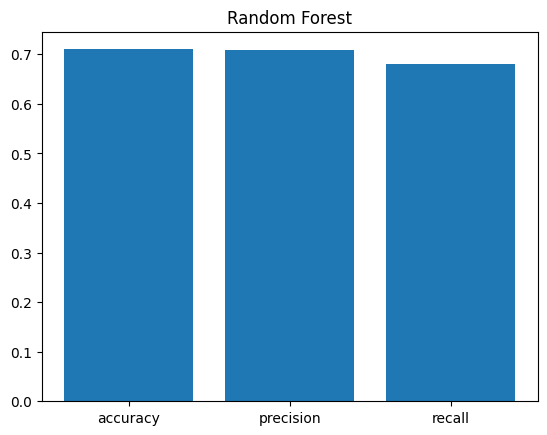

정확도: 0.7100, 정밀도: 0.7081, 재현율: 0.6796,    F1: 0.6907


In [15]:
print_graph(y_test, y_pred)

참고

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(grid.best_estimator_, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.legend(loc='best')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

#linear kernel에서 각 feature의 중요도 확인
feature_importance = np.abs(svm_linear.coef_)

# 시각화
plt.figure(figsize=(18, 4))
plt.bar(range(len(feature_importance[0])), feature_importance[0])
plt.xticks(range(len(feature_importance[0])), X.columns)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('SVM Feature Importance with Linear Kernel')
plt.show()

In [ ]:
# 각 feature의 중요도 확인
# 다항식 커널에서는 coef_ 속성이 없음
# 대신 support_vectors_와 dual_coef_를 사용하여 가중치 확인
support_vectors = svm_poly.support_vectors_
dual_coef = svm_poly.dual_coef_

# 각 feature의 중요도 계산
feature_importance = np.abs(np.sum(dual_coef * support_vectors, axis=1))

# 시각화
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), X.columns)
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('SVM Feature Importance with Poly Kernel')
plt.show()